In [2]:
# Larger CNN for the MNIST Dataset
import numpy
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt


In [10]:

#K.set_image_dim_ordering('th')

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be samples*pixels*width*height
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One Hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



In [11]:
# Create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.3523 - accuracy: 0.8926 - val_loss: 0.0772 - val_accuracy: 0.9752
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0933 - accuracy: 0.9709 - val_loss: 0.0520 - val_accuracy: 0.9824
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0677 - accuracy: 0.9791 - val_loss: 0.0355 - val_accuracy: 0.9878
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0557 - accuracy: 0.9822 - val_loss: 0.0331 - val_accuracy: 0.9889
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0297 - val_accuracy: 0.9903
Epoch 6/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0274 - val_accuracy: 0.9909
Epoch 7/10
60000/60000 [==============================] 

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

#  - - - - - - - TEST single image - - - - - - - -

image = (X_test[1]).reshape(1,28,28,1) # 1->'2';    
model_pred = model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))

Large CNN Error: 0.88%
Prediction of model: 2


Test images shape: (4, 28, 28, 1)
Predicted digit: 2


TypeError: Invalid shape (28, 28, 1) for image data

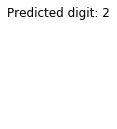

In [14]:
# - - - - - - TESTING multiple image - - - - - - - - - -

test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()



In [15]:

# - - - - - - - SAVE THE MODEL - - - - - - - -

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk
